Memuat Data:

In [1]:
import pandas as pd

# Load the dataset with the correct separator (semicolon)
data = pd.read_csv('/content/bank.csv', sep=';')

# Display the first few rows of the dataset
print(data.head())

# Check general information about the dataset
print(data.info())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #  

Eksplorasi Data (EDA):

In [4]:
# Checking for Missing Values
print("Checking for Missing Values:")
print(data.isnull().sum())  # Display the number of missing values per column

# Optional: Display all rows with missing values
missing_rows = data[data.isnull().any(axis=1)]
print(f"\nNumber of rows with missing values: {len(missing_rows)}")
if not missing_rows.empty:
    print("Rows with missing values:")
    print(missing_rows)

# Removing Missing Values
df_cleaned_rows = data.dropna()
print(f"\nDataset after removing rows with missing values: {df_cleaned_rows.shape}")

# Removing columns with missing values
df_cleaned_columns = data.dropna(axis=1)
print(f"Dataset after removing columns with missing values: {df_cleaned_columns.shape}")

# Optional: Filling Missing Values
# Example: Filling missing values with the mean for numeric columns
df_filled = data.fillna(data.mean(numeric_only=True))
print("\nDataset after filling missing values with the mean:")
print(df_filled)

Checking for Missing Values:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Number of rows with missing values: 0

Dataset after removing rows with missing values: (4521, 17)
Dataset after removing columns with missing values: (4521, 17)

Dataset after filling missing values with the mean:
      age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...          

In [6]:
# Descriptive statistics for numeric columns
print(data.describe())

# Distribution of the target variable
print(data['y'].value_counts(normalize=True) * 100)

               age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000  
y
no     88.476001

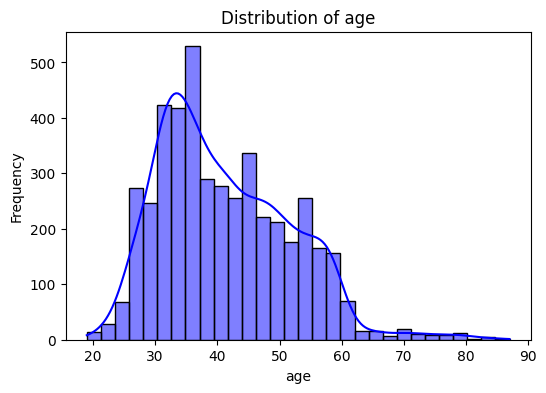

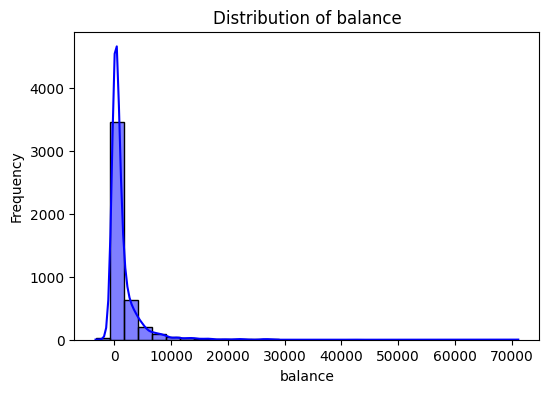

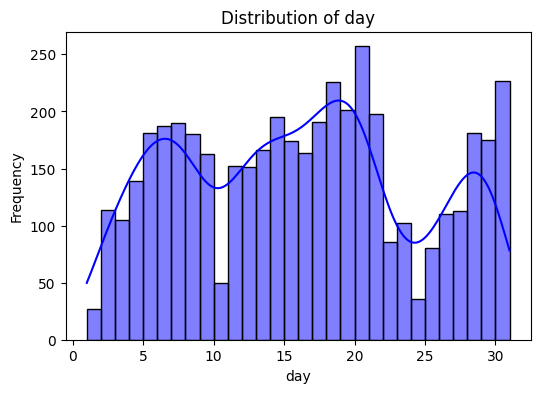

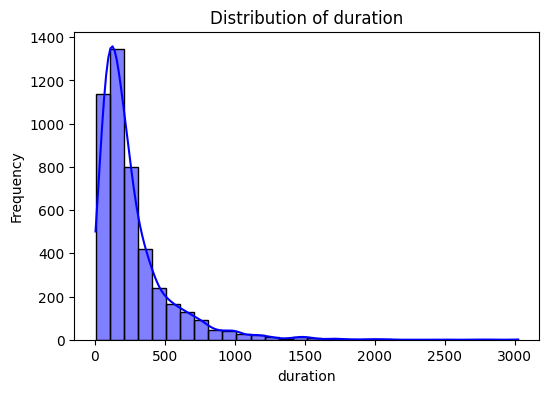

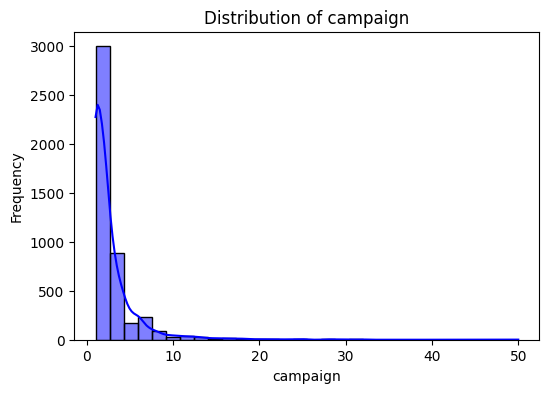

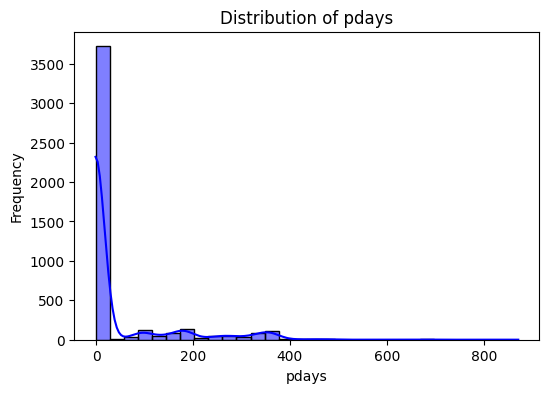

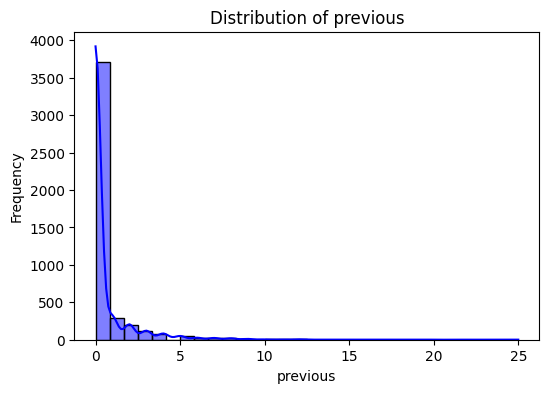

<ipython-input-8-013996cc03aa>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=data, palette='viridis')


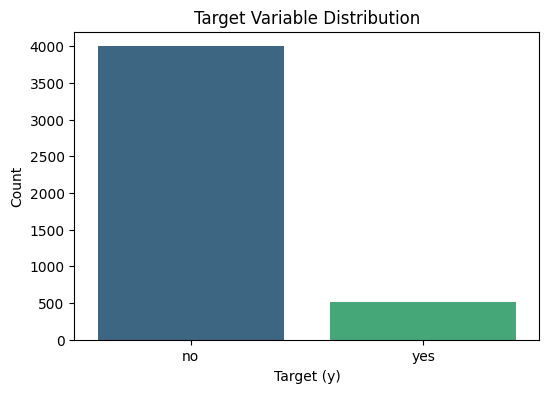

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Visualize target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=data, palette='viridis')
plt.title('Target Variable Distribution')
plt.xlabel('Target (y)')
plt.ylabel('Count')
plt.show()

Membagi Data Test dan Training:

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Assuming 'data' is your DataFrame and 'y' is the target variable column name
X = data.drop('y', axis=1)
y = data['y']

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to your target variable and transform it
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numerical and categorical features
numeric_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a ColumnTransformer to apply the preprocessing steps to the respective features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define models (same as before)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "k-NN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

Evaluasi Model:


Logistic Regression Evaluation:
  Accuracy: 0.9017
  Precision: 0.6000
  Recall: 0.2755
  F1-Score: 0.3776


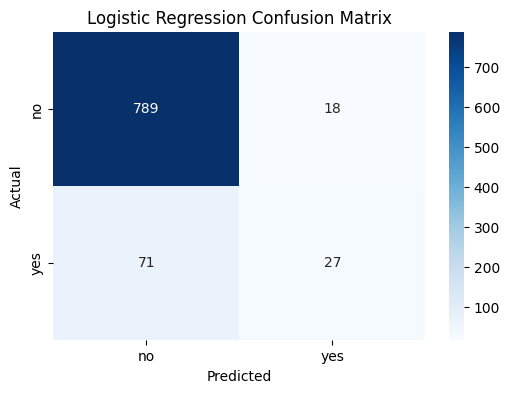


Decision Tree Evaluation:
  Accuracy: 0.8917
  Precision: 0.5000
  Recall: 0.5408
  F1-Score: 0.5196


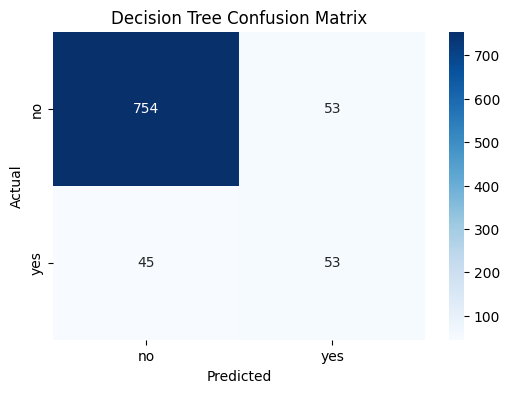


k-NN Evaluation:
  Accuracy: 0.8906
  Precision: 0.4894
  Recall: 0.2347
  F1-Score: 0.3172


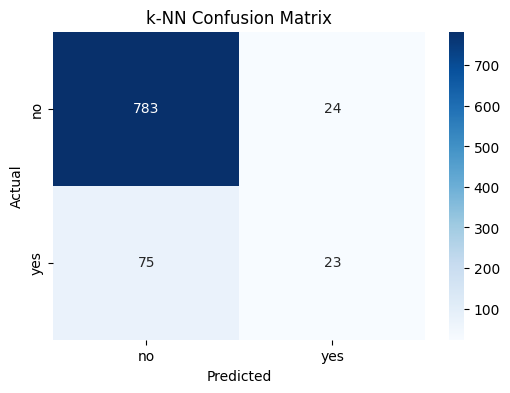

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:03:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Evaluation:
  Accuracy: 0.9072
  Precision: 0.6029
  Recall: 0.4184
  F1-Score: 0.4940


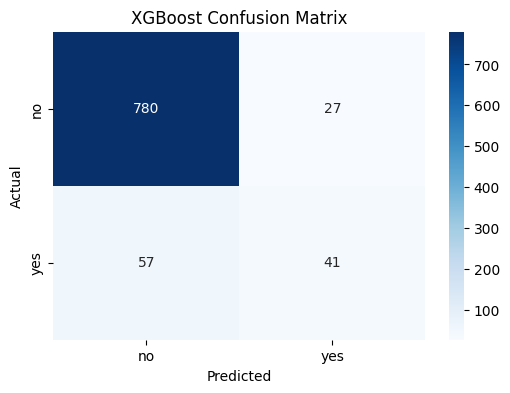

In [29]:
# Evaluate each model
results = {}
for name, model in models.items():
    # Create a pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Train the pipeline
    pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)  # Specify pos_label for encoded value
    recall = recall_score(y_test, y_pred, pos_label=1)  # Specify pos_label for encoded value
    f1 = f1_score(y_test, y_pred, pos_label=1)  # Specify pos_label for encoded value


    # Store results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

    # Print results for the current model
    print(f"\n{name} Evaluation:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [30]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for each model
param_grids = {
    "Logistic Regression": {
        'classifier__C': [0.01, 0.1, 1, 10],  # Regularization strength
        'classifier__penalty': ['l2']        # Regularization type
    },
    "Decision Tree": {
        'classifier__max_depth': [3, 5, 10, None],  # Tree depth
        'classifier__min_samples_split': [2, 5, 10],  # Minimum samples to split
    },
    "k-NN": {
        'classifier__n_neighbors': [3, 5, 7, 10],  # Number of neighbors
        'classifier__weights': ['uniform', 'distance']  # Weighting type
    },
    "XGBoost": {
        'classifier__n_estimators': [50, 100, 200],  # Number of trees
        'classifier__max_depth': [3, 5, 10],         # Maximum tree depth
        'classifier__learning_rate': [0.01, 0.1, 0.3]  # Learning rate
    }
}

# Initialize results dictionary
tuned_results = {}

# Perform GridSearchCV for each model
for name, param_grid in param_grids.items():
    print(f"Tuning hyperparameters for {name}...")

    # Initialize the model pipeline
    model = models[name]
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Initialize GridSearchCV
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=5,  # 5-fold cross-validation
        scoring='accuracy',
        n_jobs=-1  # Use all processors
    )

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)

    # Best parameters and score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    tuned_results[name] = {'Best Params': best_params, 'Best Score': best_score}

    print(f"Best Parameters for {name}: {best_params}")
    print(f"Best Cross-Validated Accuracy for {name}: {best_score:.4f}\n")

# Display the summary of tuned results in a vertical format
print("\nSummary of Hyperparameter Tuning:")
for model_name, result in tuned_results.items():
    print(f"\nModel: {model_name}")
    print(f"  Best Parameters: {result['Best Params']}")
    print(f"  Best Cross-Validated Accuracy: {result['Best Score']:.4f}")

Tuning hyperparameters for Logistic Regression...
Best Parameters for Logistic Regression: {'classifier__C': 10, 'classifier__penalty': 'l2'}
Best Cross-Validated Accuracy for Logistic Regression: 0.9024

Tuning hyperparameters for Decision Tree...
Best Parameters for Decision Tree: {'classifier__max_depth': 3, 'classifier__min_samples_split': 2}
Best Cross-Validated Accuracy for Decision Tree: 0.8966

Tuning hyperparameters for k-NN...
Best Parameters for k-NN: {'classifier__n_neighbors': 5, 'classifier__weights': 'uniform'}
Best Cross-Validated Accuracy for k-NN: 0.8924

Tuning hyperparameters for XGBoost...
Best Parameters for XGBoost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 50}
Best Cross-Validated Accuracy for XGBoost: 0.8991


Summary of Hyperparameter Tuning:

Model: Logistic Regression
  Best Parameters: {'classifier__C': 10, 'classifier__penalty': 'l2'}
  Best Cross-Validated Accuracy: 0.9024

Model: Decision Tree
  Best Param

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:03:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tuning hyperparameters for Logistic Regression...
Tuning hyperparameters for Decision Tree...
Tuning hyperparameters for k-NN...
Tuning hyperparameters for XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:04:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
<ipython-input-31-a36c7be57c72>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison_df, x='Model', y='Best Test Score', palette='viridis', hue=None)


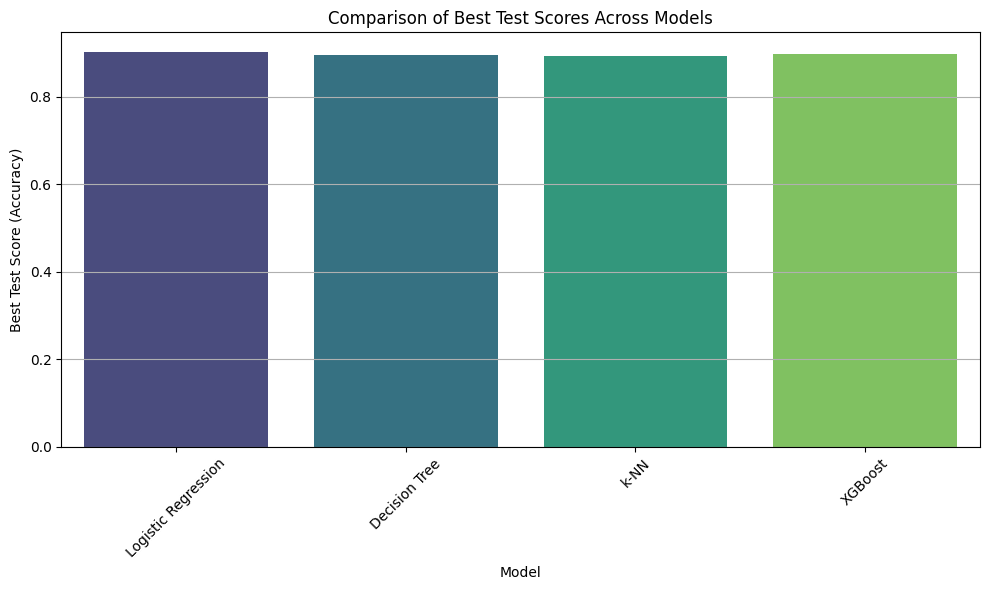

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize dictionary to store the best scores from GridSearchCV for comparison
model_comparison = {}

# Perform GridSearchCV for each model and collect the best test score
for name, param_grid in param_grids.items():
    print(f"Tuning hyperparameters for {name}...")

    # Initialize the model pipeline
    model = models[name]
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Initialize GridSearchCV
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=5,  # 5-fold cross-validation
        scoring='accuracy',
        n_jobs=-1,
        return_train_score=True  # Collect training score as well
    )

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)

    # Save the best test score for each model
    best_score = grid_search.best_score_
    model_comparison[name] = best_score

# Convert model_comparison dictionary to DataFrame for easy plotting
comparison_df = pd.DataFrame(list(model_comparison.items()), columns=['Model', 'Best Test Score'])

# Visualize comparison of best test scores for different models
plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_df, x='Model', y='Best Test Score', palette='viridis', hue=None)

plt.title("Comparison of Best Test Scores Across Models")
plt.xlabel("Model")
plt.ylabel("Best Test Score (Accuracy)")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()